In [1]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

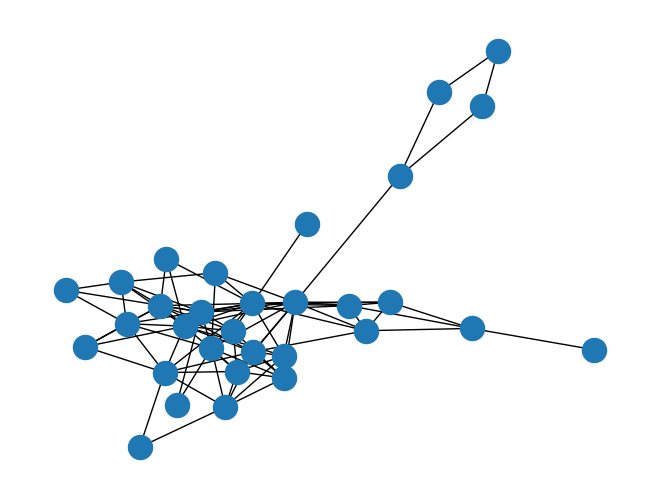

In [62]:
# file_path = '/home/donald/Downloads/ass2/Karate.txt

Cervantes = "C:/Users/godis/Downloads/Networks/Centrality (3).txt"
tortoise = "C:/Users/godis/Downloads/Networks/Tortoise.txt"

G = nx.read_weighted_edgelist(tortoise)
plt.clf()
nx.draw(G)
plt.savefig("ass.png")
plt.show()
A=nx.to_numpy_array(G)

In [63]:
A

array([[0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0

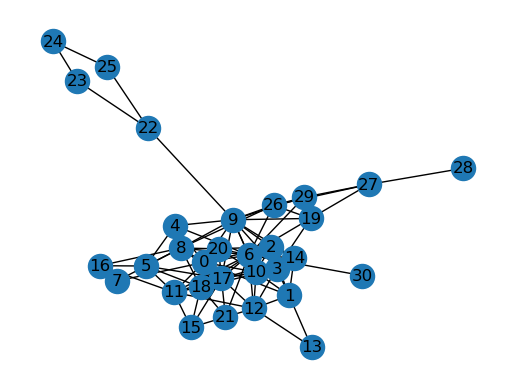

[ 9.  7.  7.  9.  4.  6. 15.  2. 10. 13.  9.  8.  8.  2.  7.  4.  3. 13.
  9.  6.  6.  3.  3.  2.  2.  2.  6.  4.  1.  5.  1.]


In [64]:
#Redraw network graph to order node labelling in adjacency matrix.
G = nx.from_numpy_array(A)
plt.clf()
pos = nx.spring_layout(G)
nx.draw_networkx(G)
#nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.savefig("pth2.png")
plt.show()
#Define some vector quantities
n = len(A)
e = np.ones(n)
k = np.dot(A,e)
print(k)

In [65]:
# Use the eigenvalues to calculate the number of triangles in G and also
# the number of closed walks of length 4 and 5.
u,v = lg.eigh(A)
print(sum(u**3)/6)
print(sum(u**4))
print(sum(u**5))

95.99999999999989
6045.999999999992
41539.999999999935


In [66]:
u
#find the index of the second largest value from the array (u that consists of eigenvalues of A)



array([-3.63335413e+00, -3.34835718e+00, -3.20770599e+00, -2.85738940e+00,
       -2.21928351e+00, -1.96063891e+00, -1.77229149e+00, -1.65360608e+00,
       -1.42957551e+00, -1.23200828e+00, -1.16355888e+00, -9.38035996e-01,
       -7.95639338e-01, -7.29687930e-01, -4.41610704e-01, -1.07176094e-01,
       -2.89153893e-02,  1.11022302e-16,  1.50421286e-01,  2.55934668e-01,
        3.73263673e-01,  5.94328133e-01,  6.55830666e-01,  1.12992923e+00,
        1.37866473e+00,  1.88516139e+00,  2.05815590e+00,  2.58703187e+00,
        3.95920953e+00,  4.12852101e+00,  8.36238273e+00])

In [67]:
v[:,0]

array([-0.26723027,  0.11500339,  0.03963612,  0.20630288, -0.13314363,
        0.11864236,  0.57567205,  0.06840497,  0.01869078,  0.05667381,
        0.20230441,  0.02770029, -0.35604618,  0.06634167, -0.30915666,
        0.17263422, -0.04542178, -0.07231703, -0.22657833, -0.19909094,
       -0.14790961, -0.07617664, -0.01898866,  0.00615935, -0.00339045,
        0.00615935, -0.1278464 ,  0.13331423, -0.03669178, -0.12074869,
       -0.15844094])

In [68]:
#getting the index of the second largest positive eigenvalue
filtered_index_array= np.where(u > 0)[0]

second_largest_index= filtered_index_array[-2]
second_largest_index

29

<Figure size 640x480 with 0 Axes>

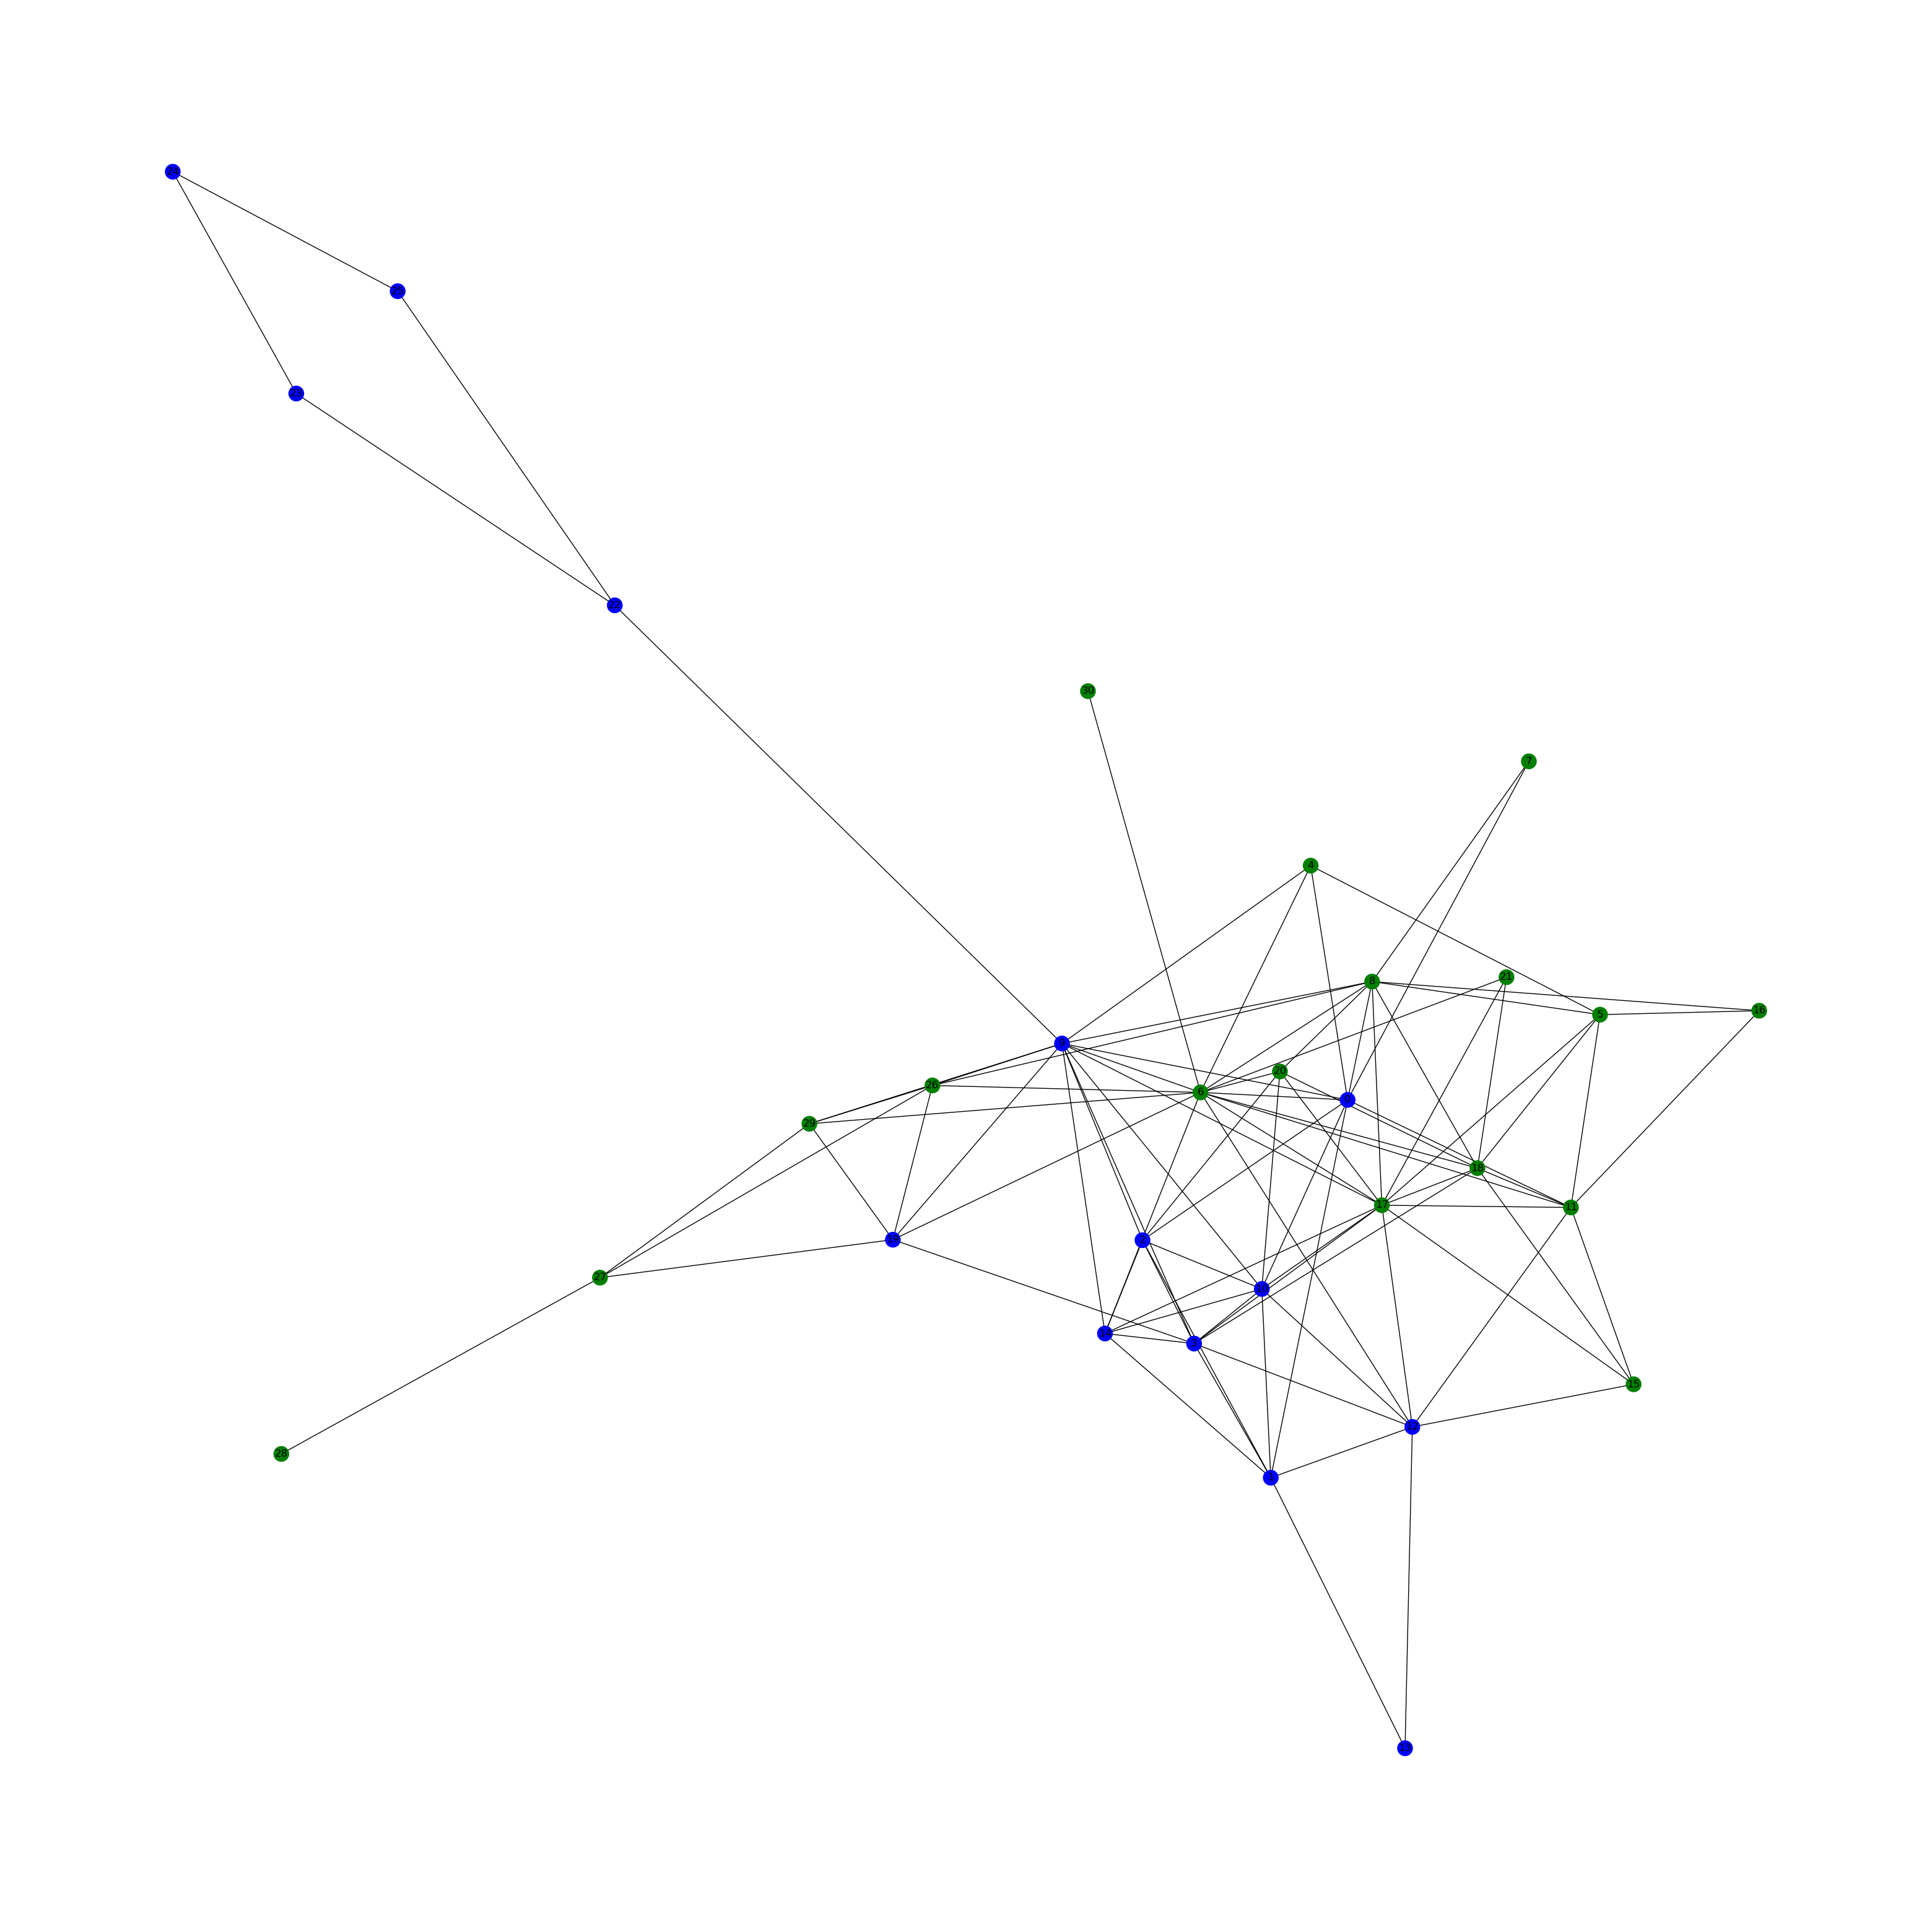

In [69]:
#  Use the eigenvector associated with the most negative eigenvalue) of A to
# determine a partition of G into almost bipartite form.
#we are getting an eigenvector associated with the eigenvalue at index "second_largest_index"
P=v[:,second_largest_index] # Put eigenvector here
C1 = np.where(P>0)[0] # C1 is a vector of indices of P which are positive
C2 = np.where(P<=0)[0] # C2 is a vector of indices of P which are non-positive
colour = np.tile('g',n)  # Default colour is green
colour[C1] = 'b'  # Turn one partition blue
plt.clf()
#plt.title("MySQL Database Network", fontsize=30, fontweight='bold')
plt.figure(figsize=(40, 40))  # Added very large figure size
nx.draw_networkx(G,pos,node_color = colour)
plt.axis('off')
plt.savefig('ass.png')
plt.show()


In [59]:
#we are computing the number of edges within each commnunity:
graph_C1 = G.subgraph(C1)
edges_array_C1 = graph_C1.edges()
number_of_edges_C1 = len(edges_array_C1)
print("the number of edges within C1 in centrality dataset are: " , number_of_edges_C1)

graph_C2 = G.subgraph(C2)
edges_array_C2 = graph_C2.edges()
number_of_edges_C2= len(edges_array_C2)
print("the number of edges within C2 in centrality dataset are: ", number_of_edges_C2)


the number of edges within C1 in centrality dataset are:  188
the number of edges within C2 in centrality dataset are:  237


In [60]:
#we are computing the number of edges between the two comunities
edges_C1_C2_list= []
for i,j in G.edges():
    if (i in C1 and j in C2) or (i in C2 and j in C1):
        edges_C1_C2_list.append((i,j))

print("number of edges between two communities(C1 and C2) in Centrality dataset are: " , len(edges_C1_C2_list))
        

number of edges between two communities(C1 and C2) in Centrality dataset are:  188


In [15]:
(np.sum(A[np.ix_(C1,C1)])+np.sum(A[np.ix_(C2,C2)]))/2

194.0

In [31]:
np.sum(A[np.ix_(C1,C2)])

np.float64(2972.0)

In [32]:
np.sum(A)/2

np.float64(4190.0)

In [33]:
m = np.sum(A)/2
G2 = nx.erdos_renyi_graph(n,2*m/n/(n-1))
A2 = nx.to_numpy_array(G2)
np.sum(A2)/2

np.float64(4139.0)

In [34]:
A@A@A

array([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 5.,  4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ..., 15., 15.,  8.]], shape=(1480, 1480))

In [35]:
lg.trace(A@A@A)

np.float64(10776.0)

In [36]:
A2@A2@A2

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0., 10.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.]], shape=(1480, 1480))

In [37]:
lg.trace(A2@A2@A2)

np.float64(222.0)

In [38]:
lg.matrix_power(A,3)

array([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 5.,  4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ..., 15., 15.,  8.]], shape=(1480, 1480))

In [39]:
np.matrix(A)**3

matrix([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
        [ 5.,  4.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0., 15.],
        [ 0.,  0.,  0., ...,  0.,  0., 15.],
        [ 0.,  0.,  0., ..., 15., 15.,  8.]], shape=(1480, 1480))

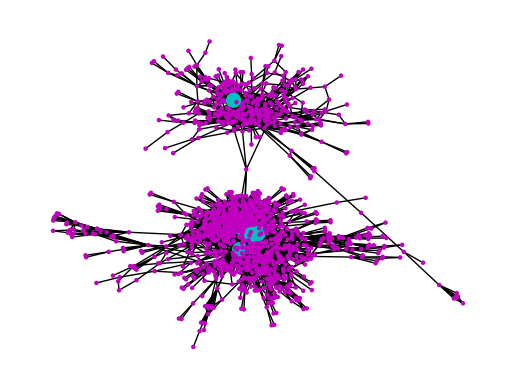

[ 126  566  745  737 1472]


In [40]:
nd = np.argsort(-k)[0:5]
colour = np.tile('m',n)
ns = np.ones(n)*5
colour[nd] = 'c'
ns[nd]=100
nx.draw_networkx(G,pos,node_color = colour,node_size=ns,with_labels=False)
plt.axis('off')
plt.show()
print(nd)